### Imports

In [1]:
from src.methods import (SafeLevelSmote,BorderlineSMOTE,OneSidedSelection)
from src.c45 import C45
import pandas as pd
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import  numpy as np


### Calculate performance metrics based on C4.5 classification

In [2]:
def score_data(x: np.array, y: np.array, cv=5) -> pd.DataFrame:
	clf = C45()
	y_pred = cross_val_predict(clf, x, y, cv=cv)
	return pd.DataFrame(classification_report(y,y_pred,output_dict=True))

In [3]:
def visualize_points(X, y) -> None:
    c =['tab:orange' if i ==1 else "tab:blue" for i in y]
    print(X)
    plt.scatter(X[:, 0], X[:, 1], c=c)
    plt.show()

### Datasets

#### Dummy dataset

Counter({0: 990, 1: 10})


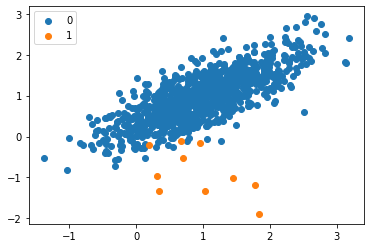

In [8]:
dummy_X, dummy_y = make_classification(n_samples=1000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
counter = Counter(dummy_y)
print(counter)
for label, _ in counter.items():
	row_ix = np.where(dummy_y == label)[0]
	plt.scatter(dummy_X[row_ix, 0], dummy_X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

##### Base performance

In [9]:
base_scores_dummy = score_data(dummy_X, dummy_y)
display(base_scores_dummy)

,0,1,accuracy,macro avg,weighted avg
precision,0.995964,0.666667,0.993,0.831315,0.992671
recall,0.996970,0.600000,0.993,0.798485,0.993000
f1-score,0.996466,0.631579,0.993,0.814023,0.992818
support,990.000000,10.000000,0.993,1000.000000,1000.000000


#### Satimage

In [12]:
satimage_df = pd.read_csv('datasets/satimage.csv')
satimage = satimage_df.to_numpy()
satimage_X,satimage_y =satimage[:,:-1],satimage[:,-1]
satimage_y = np.where(satimage_y==4.0,1.0,0.0)

##### Base performance

In [13]:
base_scores_satimage = score_data(satimage_X, satimage_y)
display(base_scores_satimage)

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.952067,0.519345,0.906843,0.735706,0.910006
recall,0.944358,0.558400,0.906843,0.751379,0.906843
f1-score,0.948197,0.538165,0.906843,0.743181,0.908341
support,5805.000000,625.000000,0.906843,6430.000000,6430.000000


### Compare performance of methods

In [14]:
def report(strategy, X, y, base_scores,visualize=False):
	X_resampled,y_resampled = strategy.fit_resample(X, y)
	resampled_scores_dummy = score_data(X_resampled,y_resampled)
	difference = (resampled_scores_dummy-base_scores).round(3)
	display(difference)
	if visualize:
		visualize_points(X_resampled,y_resampled)

#### BorderlineSMOTE

##### Dummy dataset

,0,1,accuracy,macro avg,weighted avg
precision,0.001,0.093,-0.002,0.047,-0.001
recall,-0.003,0.264,-0.002,0.130,-0.002
f1-score,-0.001,0.177,-0.002,0.088,-0.001
support,0.000,12.000,-0.002,12.000,12.000


[[-0.12289294  0.11047044]
 [ 0.33605863 -1.33226151]
 [ 1.40439918  1.41694259]
 ...
 [ 0.69499472 -1.16623467]
 [ 0.23870487 -0.51060817]
 [ 0.31183545 -1.0436844 ]]


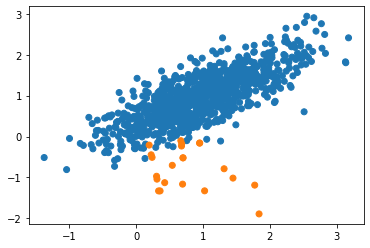

In [17]:
report(BorderlineSMOTE(),dummy_X, dummy_y,base_scores_dummy,True)

##### Satimage

In [18]:
report(BorderlineSMOTE(),satimage_X, satimage_y,base_scores_satimage)

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.002,0.238,0.009,0.120,0.008
recall,-0.002,0.240,0.009,0.119,0.009
f1-score,0.000,0.239,0.009,0.120,0.009
support,0.000,675.000,0.009,675.000,675.000


#### OneSidedSelection

##### Dummy dataset

,0,1,accuracy,macro avg,weighted avg
precision,-0.005,0.0,-0.008,-0.002,-0.009
recall,-0.004,0.0,-0.008,-0.002,-0.008
f1-score,-0.004,0.0,-0.008,-0.002,-0.008
support,-540.000,0.0,-0.008,-540.000,-540.000


[[ 1.31629625e+00  1.78304811e+00]
 [-1.22892944e-01  1.10470444e-01]
 [ 4.95097550e-01  7.51184989e-01]
 [ 7.25966820e-01  8.55419653e-01]
 [-4.46246329e-01 -1.84458820e-01]
 [ 7.49115121e-01  2.39935588e-01]
 [-2.51688227e-02 -2.91205983e-01]
 [ 1.54130051e-01  1.00665096e-01]
 [ 4.20313250e-02  7.28320990e-01]
 [ 1.10724499e-01 -2.87734648e-01]
 [ 6.86914106e-01  2.34418093e-01]
 [ 1.21496447e-02  1.54855187e-01]
 [-4.70955883e-01  4.50036449e-01]
 [ 5.60135533e-01  9.04112687e-02]
 [ 3.30519323e-01  3.74385106e-01]
 [ 1.27407560e+00  7.61764507e-01]
 [ 7.48316547e-01  8.41502377e-01]
 [ 2.64455830e-01  5.15987703e-01]
 [-4.54185287e-01  4.58422520e-01]
 [ 7.97819742e-02  3.31821599e-01]
 [-4.70182875e-02  1.11346156e+00]
 [ 8.88865327e-01  4.94287551e-01]
 [ 9.50064707e-01  6.36991328e-01]
 [ 1.00510688e+00  5.95751845e-01]
 [ 1.19212040e+00  7.41972025e-01]
 [ 9.58181232e-01  3.45479453e-01]
 [ 4.38181485e-01  2.26643842e-01]
 [ 5.54400009e-02  4.73954474e-01]
 [ 2.73791557e-01  9

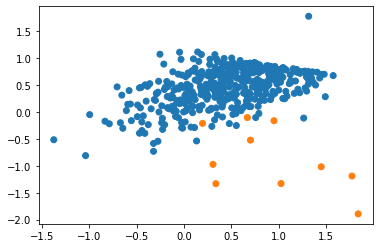

In [19]:
report(OneSidedSelection(),dummy_X, dummy_y,base_scores_dummy,True)

##### Satimage

In [ ]:
report(OneSidedSelection(),satimage_X, satimage_y, base_scores_satimage)

#### SafeLevelSmote

##### Dummy dataset

,0,1,accuracy,macro avg,weighted avg
precision,0.001,0.072,-0.002,0.037,-0.001
recall,-0.003,0.250,-0.002,0.123,-0.002
f1-score,-0.001,0.159,-0.002,0.079,-0.001
support,0.000,10.000,-0.002,10.000,10.000


[[-0.12289294  0.11047044]
 [ 0.33605863 -1.33226151]
 [ 1.40439918  1.41694259]
 ...
 [ 0.52627384 -0.79504618]
 [ 0.66912002 -0.10214747]
 [ 0.15384441 -0.24407696]]


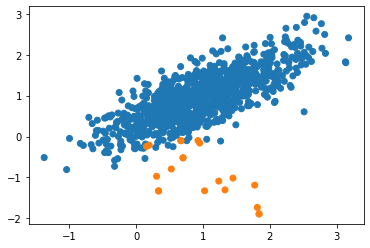

In [10]:
report(SafeLevelSmote(),dummy_X, dummy_y,base_scores_dummy,True)

##### Satimage

In [15]:
report(SafeLevelSmote(),satimage_X, satimage_y, base_scores_satimage)

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.007,0.215,0.008,0.111,0.009
recall,-0.008,0.254,0.008,0.123,0.008
f1-score,-0.001,0.233,0.008,0.116,0.008
support,0.000,625.000,0.008,625.000,625.000
